# Dynamic Mode Decomposition

In [1]:
# generating play data

In [2]:
import numpy as np
np.random.seed(3) # setting random state as 3

In [3]:
# define time and space domains

In [4]:
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 6*np.pi, 80)
dt = t[2] - t[1]
Xm,Tm = np.meshgrid(x, t)

In [5]:
x.shape

(100,)

In [6]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [7]:
t.shape

(80,)

In [8]:
t

array([  0.        ,   0.23860197,   0.47720395,   0.71580592,
         0.95440789,   1.19300987,   1.43161184,   1.67021382,
         1.90881579,   2.14741776,   2.38601974,   2.62462171,
         2.86322368,   3.10182566,   3.34042763,   3.57902961,
         3.81763158,   4.05623355,   4.29483553,   4.5334375 ,
         4.77203947,   5.01064145,   5.24924342,   5.48784539,
         5.72644737,   5.96504934,   6.20365132,   6.44225329,
         6.68085526,   6.91945724,   7.15805921,   7.39666118,
         7.63526316,   7.87386513,   8.11246711,   8.35106908,
         8.58967105,   8.82827303,   9.066875  ,   9.30547697,
         9.54407895,   9.78268092,  10.02128289,  10.25988487,
        10.49848684,  10.73708882,  10.97569079,  11.21429276,
        11.45289474,  11.69149671,  11.93009868,  12.16870066,
        12.40730263,  12.64590461,  12.88450658,  13.12310855,
        13.36171053,  13.6003125 ,  13.83891447,  14.07751645,
        14.31611842,  14.5547204 ,  14.79332237,  15.03

In [11]:
Xm.shape

(80, 100)

In [9]:
Xm

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ..., 
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [12]:
Tm.shape

(80, 100)

In [13]:
Tm

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.23860197,   0.23860197,   0.23860197, ...,   0.23860197,
          0.23860197,   0.23860197],
       [  0.47720395,   0.47720395,   0.47720395, ...,   0.47720395,
          0.47720395,   0.47720395],
       ..., 
       [ 18.37235197,  18.37235197,  18.37235197, ...,  18.37235197,
         18.37235197,  18.37235197],
       [ 18.61095395,  18.61095395,  18.61095395, ...,  18.61095395,
         18.61095395,  18.61095395],
       [ 18.84955592,  18.84955592,  18.84955592, ...,  18.84955592,
         18.84955592,  18.84955592]])

In [7]:
# create three spatiotemporal patterns

In [14]:
f1 = np.multiply(20-0.2* np.power(Xm, 2), np.exp((2.3j)*Tm))
f2 = np.multiply(Xm, np.exp(0.6j*Tm))
f3 = np.multiply(5*np.multiply(1/np.cosh(Xm/2), np.tanh(Xm/2)), 2*np.exp((0.1+2.8j)*Tm))

In [11]:
# combine signals and make data matrix

In [15]:
D = (f1 + f2 + f3).T

In [16]:
print D.shape

(100, 80)


In [17]:
# visualizing what we have generated

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


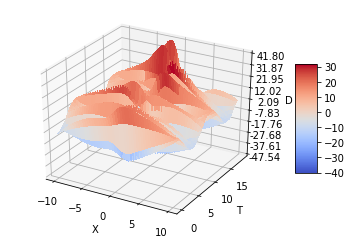

In [18]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = Xm,Tm
Z = D.T
Z = Z.astype(np.float64)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z.min(), Z.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('D')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.show()

In [30]:
# create DMD input-output pairs

In [19]:
X = D[:,:-1]
Y = D[:,1:]

In [20]:
print X.shape

(100, 79)


In [21]:
print Y.shape

(100, 79)


# DMD - 1. SVD(X)

In [22]:
from numpy.linalg import svd

In [23]:
U2,Sig2,Vh2 = svd(X, False)

In [24]:
print U2.shape

(100, 79)


In [26]:
print Sig2.shape

(79,)


In [27]:
print Vh2.shape

(79, 79)


In [28]:
Sig2[0:10]

array([  1.31001245e+03,   7.64453332e+02,   4.50846398e+02,
         1.93965732e-13,   1.18252136e-13,   1.18252136e-13,
         1.18252136e-13,   1.18252136e-13,   1.18252136e-13,
         1.18252136e-13])

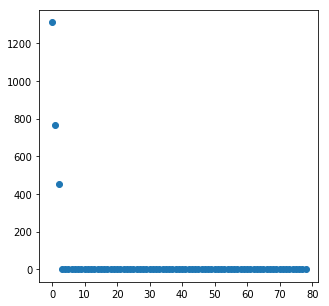

In [29]:
modes_no = np.arange(Sig2.shape[0])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
#ax = plt.subplot(111)
#line, = plt.plot(modes_no, Sig2, lw=2)

plt.scatter(modes_no, Sig2)

#plt.xlabel('x')
#plt.ylabel('2x-32')
plt.show()

# DMD - 2. Truncation of U, S, V

In [41]:
# rank-3 truncation

In [30]:
r = 3
U = U2[:,:r]
Sig = np.diag(Sig2)[:r,:r]
V = Vh2.conj().T[:,:r]

In [31]:
print U.shape

(100, 3)


In [32]:
print Sig.shape

(3, 3)


In [33]:
print V.shape

(79, 3)


# DMD - 3. Computing approximation of A

In [34]:
from numpy import dot
Atil = dot(dot(dot(U.conj().T, Y), V), np.linalg.inv(Sig))

In [35]:
Atil.shape

(3, 3)

# DMD - 4. Finding Eigen vector and values of approximated A

In [36]:
mu,W = np.linalg.eig(Atil)

In [37]:
print mu.shape

(3,)


In [64]:
mu

array([ 0.85315920+0.52165063j,  0.80396481+0.63444301j,
        0.98976993+0.14267267j])

In [38]:
print W.shape

(3, 3)


# DMD - 5. build DMD modes

In [39]:
Phi = dot(dot(dot(Y, V), np.linalg.inv(Sig)), W)

In [40]:
print Phi.shape

(100, 3)


In [41]:
mode1 = Phi[:,0]
mode2 = Phi[:,1]
mode3 = Phi[:,2]

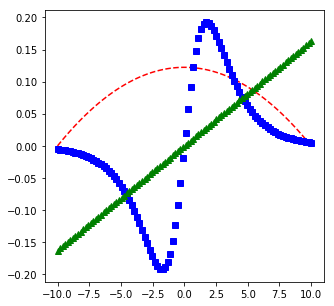

In [47]:
import matplotlib.pyplot as plt
plt.plot(x, mode1, 'r--')
plt.plot(x, mode2, 'bs')
plt.plot(x, mode3, 'g^')
plt.show()

# compute time evolution

In [50]:
b = dot(np.linalg.pinv(Phi), X[:,0])
Psi = np.zeros([r, len(t)], dtype='complex')
for i,_t in enumerate(t):
    Psi[:,i] = np.multiply(np.power(mu, _t/dt), b)

In [51]:
print Psi.shape

(3, 80)


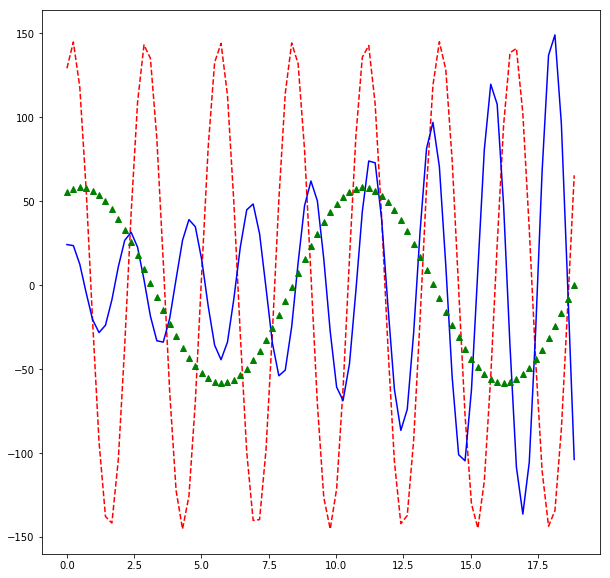

In [63]:
import matplotlib.pyplot as plt
plt.plot(t, Psi[0,:], 'r--')
plt.plot(t, Psi[1,:], 'b-')
plt.plot(t, Psi[2,:], 'g^')
plt.show()

# compute DMD reconstruction

In [52]:
D2 = dot(Phi, Psi)

In [53]:
D2.shape

(100, 80)

In [54]:
np.allclose(D, D2)

True

In [55]:
error = D - D2

In [56]:
error.shape

(100, 80)

In [60]:
# visualizing error

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


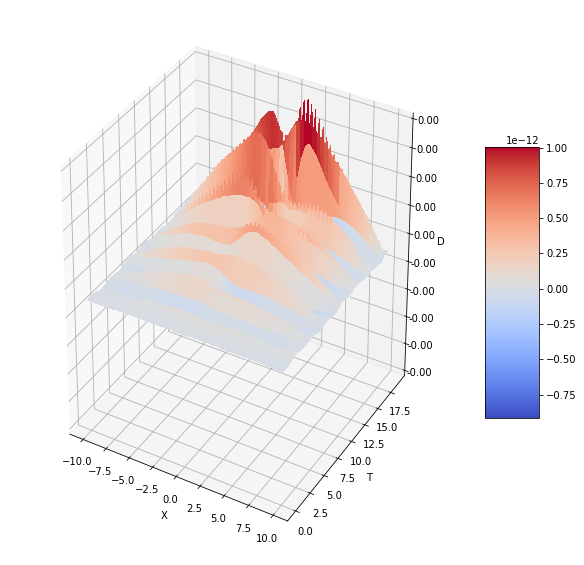

In [59]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = Xm,Tm
Z = error.T
Z = Z.astype(np.float64)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z.min(), Z.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('D')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.show()